> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 9: Parsing and Information Extraction

*Morning, August 17, 2018*

In this Exercise Set we shall develop our webscraping skills even further by practicing navigating html trees using BeautifoulSoup and furthermore train extracting information from raw text with no html tags to help, using regular expressions. 

## Exercise Section 9.1: Parsing a Table from HTML using BeautifulSoup.

Yesterday I showed you a neat little prepackaged function in pandas that did all the work. However today we should learn the mechanics of it. *(It is not just for educational purposes, sometimes the package will not do exactly as you want.)*

We hit the Basketball stats page from yesterday again: https://www.basketball-reference.com/leagues/NBA_2018.html.


> **Ex. 9.1.1:** Here we practice simply locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. And then use the **>Inspector<** tool (* right click on the table < press inspect element *) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.

In [1]:
# [Answer to Ex. 9.1.1]
import requests
from bs4 import BeautifulSoup
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html,'lxml')

You have located the table should now build a function that starts at a "table node" and parses the information, and outputs a pandas DataFrame. 

Inspect the element either within the notebook or through the **>Inspector<** tool and start to see how a table is written in html. Which tag names can be used to locate rows? How will you iterate through columns. Were is the header located?

> **Ex. 9.1.2:** First you parse the header which can be found in the canonical tag name: thead. 
Next you use the `find_all` method to search for the tag, and iterate through each of the elements extracting the text, using the `.text` method builtin to the the node object. Store the header values in a list container. 

In [27]:
# [Answer to Ex. 9.1.2]
import pandas as pd
table = soup.find('table', attrs={'id':'confs_standings_E'})
table_rows = table.find_all('tr')
print(table_rows)
def func_to_pd(rows):
    l = []
    for tr in rows:
        td = tr.find_all('td')
        row = [tr.text for tr in td]
        l.append(row)
    pd.DataFrame(l, columns=["Name", "W","L","W/L%","GB", "PS/G","PA/G" ])
    return l
func_to_pd(table_rows)

[<tr>
<th aria-label="Eastern Conference" class=" poptip sort_default_asc left" data-stat="team_name" scope="col">Eastern Conference</th>
<th aria-label="Wins" class=" poptip right" data-stat="wins" data-tip="Wins" scope="col">W</th>
<th aria-label="Losses" class=" poptip right" data-stat="losses" data-tip="Losses" scope="col">L</th>
<th aria-label="Win-Loss Percentage" class=" poptip right" data-stat="win_loss_pct" data-tip="Win-Loss Percentage" scope="col">W/L%</th>
<th aria-label="Games Behind" class=" poptip sort_default_asc right" data-stat="gb" data-tip="Games Behind" scope="col">GB</th>
<th aria-label="Points Per Game" class=" poptip right" data-stat="pts_per_g" data-tip="Points Per Game" scope="col">PS/G</th>
<th aria-label="Opponent Points Per Game" class=" poptip right" data-stat="opp_pts_per_g" data-tip="Opponent Points Per Game" scope="col">PA/G</th>
<th aria-label="Simple Rating System" class=" poptip right" data-stat="srs" data-tip="Simple Rating System; a team rating tha

[[],
 ['59', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['55', '27', '.671', '4.0', '104.0', '100.4', '3.23'],
 ['52', '30', '.634', '7.0', '109.8', '105.3', '4.30'],
 ['50', '32', '.610', '9.0', '110.9', '109.9', '0.59'],
 ['48', '34', '.585', '11.0', '105.6', '104.2', '1.18'],
 ['44', '38', '.537', '15.0', '103.4', '102.9', '0.15'],
 ['44', '38', '.537', '15.0', '106.5', '106.8', '-0.45'],
 ['43', '39', '.524', '16.0', '106.6', '106.0', '0.53'],
 ['39', '43', '.476', '20.0', '103.8', '103.9', '-0.26'],
 ['36', '46', '.439', '23.0', '108.2', '108.0', '0.07'],
 ['29', '53', '.354', '30.0', '104.5', '108.0', '-3.53'],
 ['28', '54', '.341', '31.0', '106.6', '110.3', '-3.67'],
 ['27', '55', '.329', '32.0', '102.9', '110.0', '-6.84'],
 ['25', '57', '.305', '34.0', '103.4', '108.2', '-4.92'],
 ['24', '58', '.293', '35.0', '103.4', '108.8', '-5.30']]

> **Ex. 9.1.3:** Next you locate the rows, using the canonical tag name: tbody. And from here you search for all rows tags. Fiugre out the tag name yourself, inspecting the tbody node in python or using the **Inspector**. 

In [25]:
# [Answer to Ex. 9.1.3]
table_rows_tags = table.find_all('tbody')
# print(table_rows_tags)
l1 = []
for x in table_rows_tags:
    a = x.find_all('a')
    row = [x.text for x in a]
    l1.append(row)
print(l1)

[['Toronto Raptors', 'Boston Celtics', 'Philadelphia 76ers', 'Cleveland Cavaliers', 'Indiana Pacers', 'Miami Heat', 'Milwaukee Bucks', 'Washington Wizards', 'Detroit Pistons', 'Charlotte Hornets', 'New York Knicks', 'Brooklyn Nets', 'Chicago Bulls', 'Orlando Magic', 'Atlanta Hawks']]


> **Ex. 9.1.4:** Next run through all the rows and extract each value, similar to how you extracted the header. However here is a slight variation: Since each value node can have a different tag depending on whether it is a digit or a string, you should use the `.children` method instead of the `.find_all` - (or write compile a regex that matches both the td tag and the th tag.) 
>Once the value nodes of each row has been located using the `.children` method you should extract the value. Store the extracted rows as a list of lists: ```[[val1,val2,...valk],...]```

In [5]:
# [Answer to Ex. 9.1.4]

> **Ex. 9.1.5:** Convert the data you have collected into a pandas dataframe. _Bonus:_ convert the code you've written above into a function which scrapes the page for you and returns a dataframe. 

In [55]:
#[Answer 9.1.5]

> **Ex. 9.1.6:** Now locate all tables from the page, using the `.find_all` method searching for the table tag name. Iterate through the table nodes and apply the function created for parsing html tables. Store each table in a dictionary using the table name as key. The name is found by accessing the id attribute of each table node, using dictionary-style syntax - i.e. `table_node['id']`.

In [56]:
# [Answer to Ex. 9.1.6]

> ** 9.1.extra.:** Compare your results to the pandas implementation. 

## Exercise Section 9.2: Practicing Regular Expressions.
This exercise is about developing your experience with designing your own regular expressions.

Remember you can always consult the regular expression reference page [here](https://www.regular-expressions.info/refquick.html), if you need to remember or understand a specific symbol. 

You should practice using *"define-inspect-refine-method"* described in the lectures to systematically ***explore*** and ***refine*** your expressions, and save all the patterns tried. You can download the small module that I created to handle this in the following way: 
``` python
import requests
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
with open('explore_regex.py','w') as f:
    f.write(response.text)
import explore_regex as e_re
```

Remember to start ***broad*** to gain many examples, and iteratively narrow and refine.

We will use a sample of the trustpilot dataset that you practiced collecting yesterday.
You can load it directly into python from the following link: https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv

> **Ex. 9.2.0:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 



In [16]:
# [Answer to Ex. 9.2.0]
import requests
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
with open('explore_regex.py','w') as f:
    f.write(response.text)
import explore_regex as e_re



import pandas as pd
import re
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)
# df.to_csv('danish_review_sample.csv',index=False)

sample_string = '\n'.join(df.sample(2000).reviewBody)
print(sample_string)

I give 1star because I can't give 0. It's the  worse company that I ever seem.  I suppose to receive a package today, and I was waiting the whole day and tracking the package when the person that supposed to bring it writes that they came and no one was here.  That was not true, I didn't leave the house a second, I was with my phone the whole day.  They didn't left any paper saying that they came,but  they write down that they came in the tracking information. I call twice and nobody seems to care about it. And the only answer was that I have to wait until the next day,  and they will deliver to a access point,  no even in my address.
The product arrived on time and as advertised. The pricing was great. I would recommend Gadget Circuit.
I WAS CHARGE TWICE FOR SAME RENTAL
exactly as shown, fast service  would order from walter drake again
The process from start to end very easy. Accessibility mad simple no time wasted..
Thank you very much!
My custom tees came quickly, on time & look gr

> **Ex. 9.2.1:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [17]:
# [Answer to exercise 9.2.1] 
import explore_regex as e_re
%matplotlib inline
explore_regex1 = e_re.ExploreRegex(sample_string)


first = '\$'
second = '[0-9]+\$'
third = '[0-9]+(?:[,.][0-9]+)?\$'
fourth = '[0-9]+(?:[,.][0-9]+)?\s{0,2}\$'
fifth = 'dollar'
sixth = '[0-9]+dollar'
seventh = '[0-9]+\sdollar'
eight = '[0-9]+(?:[,.][0-9]+)?dollar'
ninth = '[0-9]+(?:[,.][0-9]+)?\s{0,2}dollar'
patterns = [first,second,third,fourth,fifth,sixth,seventh,eight,ninth]


for pattern in patterns:
    explore_regex1.explore_difference(pattern,patterns[0])
explore_regex1.explore_pattern(second)

------ Pattern: \$	 Matched 115 patterns -----
Found 0 overlaps between the expressions:
        pattern1: \$ 	 and
        pattern2: \$
        115 included in pattern1 and not in the pattern2
        115 was included in pattern2 and not in pattern1
------ Pattern: [0-9]+\$	 Matched 5 patterns -----
Found 10 overlaps between the expressions:
        pattern1: [0-9]+\$ 	 and
        pattern2: \$
        0 included in pattern1 and not in the pattern2
        110 was included in pattern2 and not in pattern1
------ Pattern: [0-9]+(?:[,.][0-9]+)?\$	 Matched 5 patterns -----
Found 10 overlaps between the expressions:
        pattern1: [0-9]+(?:[,.][0-9]+)?\$ 	 and
        pattern2: \$
        0 included in pattern1 and not in the pattern2
        110 was included in pattern2 and not in pattern1
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}\$	 Matched 5 patterns -----
Found 10 overlaps between the expressions:
        pattern1: [0-9]+(?:[,.][0-9]+)?\s{0,2}\$ 	 and
        pattern2: \$
       

> **Ex.9.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 


------ Pattern: \$	 Matched 115 patterns -----
------ Pattern: [0-9]+\$	 Matched 5 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\$	 Matched 5 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}\$	 Matched 5 patterns -----
------ Pattern: dollar	 Matched 9 patterns -----
------ Pattern: [0-9]+dollar	 Matched 1 patterns -----
------ Pattern: [0-9]+\sdollar	 Matched 1 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?dollar	 Matched 1 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}dollar	 Matched 2 patterns -----


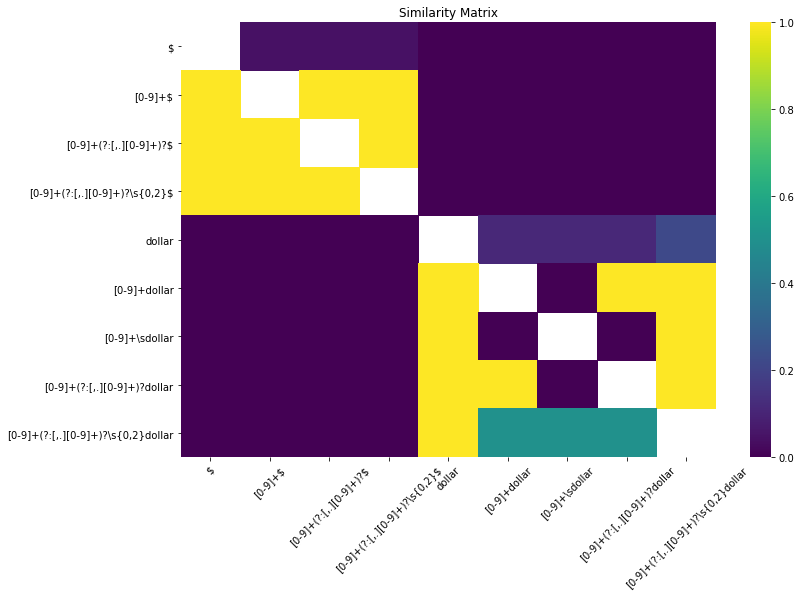

In [18]:
# [Answer 9.2.3]
explore_regex1.report('soft')

------ Pattern: \$	 Matched 115 patterns -----
------ Pattern: [0-9]+\$	 Matched 5 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\$	 Matched 5 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}\$	 Matched 5 patterns -----
------ Pattern: dollar	 Matched 9 patterns -----
------ Pattern: [0-9]+dollar	 Matched 1 patterns -----
------ Pattern: [0-9]+\sdollar	 Matched 1 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?dollar	 Matched 1 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}dollar	 Matched 2 patterns -----


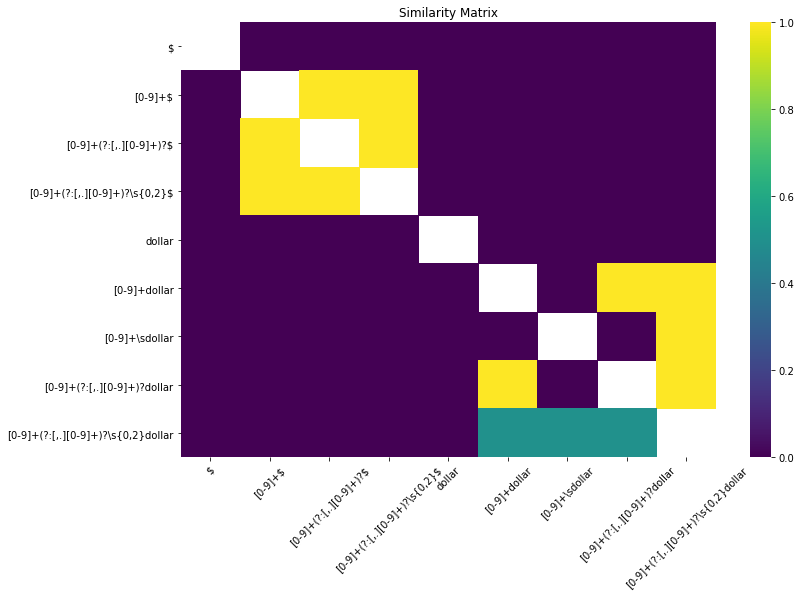

In [20]:
explore_regex1.report('hard')

>** Ex. 9.2.4** 
Finally write a function that takes in a string and outputs if there is a match. Use the .match function to see if there is a match (hint if does not return a NoneType object - `re.match(pattern,string)!=None`).

> Define a column 'mention_currency' in the dataframe, by applying the above function to the text column of the dataframe. 
*** You should have approximately 310 reviews that matches. - but less is also alright***

> **Ex. 9.2.5** Explore the relation between reviews mentioning prices and the average rating. 

> **Ex. 9.2.extra** Define a function that outputs the amount mentioned in the review (if more than one the largest), define a new column by applying it to the data, and explore whether reviews mentioning higher prices are worse than others by plotting the amount versus the rating.

In [55]:
#[Answer to 9.2.4-5]

> **Ex. 9.2.5:** Now we write a regular expression to extract emoticons from text.
Start by locating all mouths ')' of emoticons, and develop the variations from there. Remember that paranthesis are special characters in regex, so you should use the escape character.